In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('auto_cleaned.csv')

In [6]:
print(df['peak-rpm'].dtypes)

float64


In [8]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055879,0.005201,0.546655
stroke,-0.055879,1.000000,0.185136,0.036378
compression-ratio,0.005201,0.185136,1.000000,-0.190702
horsepower,0.546655,0.036378,-0.190702,1.000000


/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 55569.399832691764)

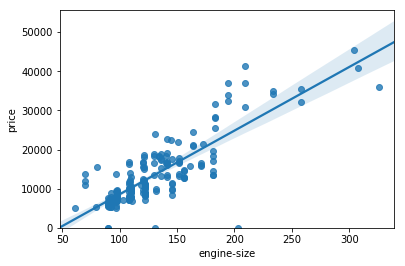

In [9]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [10]:
#examining the correlation
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.838108
price,0.838108,1.000000


/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


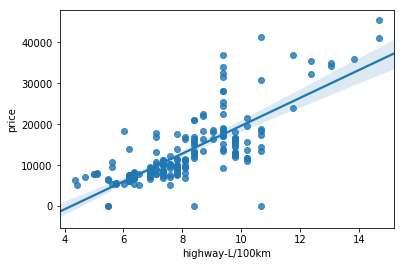

In [13]:
#correlation between highway-mpg and price
sns.regplot(x="highway-L/100km", y="price", data=df)

/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


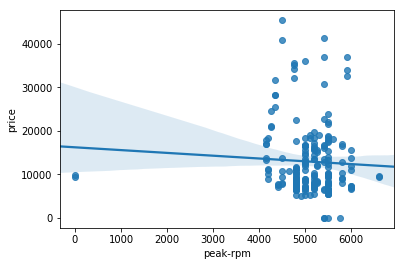

In [15]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [16]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.055312
price,-0.055312,1.000000


In [17]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.087405
price,0.087405,1.000000


/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


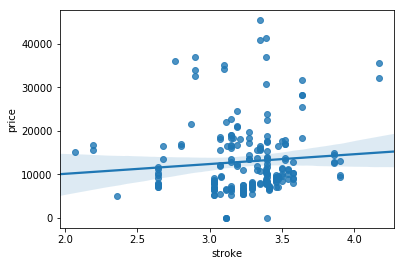

In [18]:
sns.regplot(x="stroke",y="price",data=df)

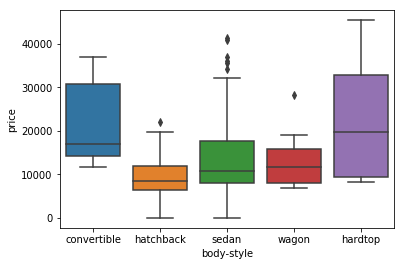

In [19]:
#boxplot for body_style and price
sns.boxplot(x="body-style", y="price",data=df)

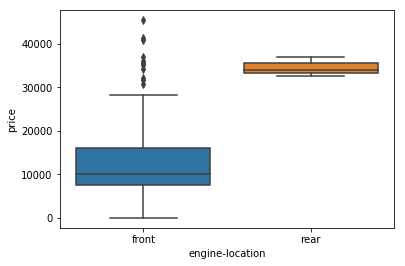

In [24]:
sns.boxplot(x="engine-location", y="price", data=df)

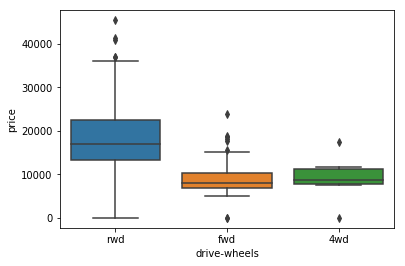

In [25]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [26]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,205,205,205,205,205,205,205,205,205
unique,22,3,5,3,2,7,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,114,96,120,202,148,159,94,111


In [27]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-type-std,turbo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.265950,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,...,103.271510,5075.398339,25.219512,8.034347,12949.494239,9.949525,0.097561,0.902439,0.819512,0.180488
std,59.322565,1.245307,57.166003,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,...,40.751170,694.412295,6.542142,1.849782,8078.938648,2.573104,0.297446,0.297446,0.385535,0.385535
min,0.000000,-2.000000,3.329751,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,...,3.329751,3.329751,13.000000,4.351852,3.329751,4.795918,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,77.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,...,70.000000,4800.000000,19.000000,6.911765,7689.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,102.000000,1.000000,103.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,...,95.000000,5200.000000,24.000000,7.833333,10198.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,153.000000,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,204.000000,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,288.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [34]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

In [35]:
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)


In [36]:
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas', 'aspiration-type-std', 'turbo'],
      dtype='object')

In [38]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,202
rear,3


In [39]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [40]:
df_group_one = df[['drive-wheels','body-style','price']]

In [41]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,9103.481083
1,fwd,9090.755496
2,rwd,19497.688549


In [42]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,3803.164876
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.643149
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [43]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3803.164876  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.643149   
rwd              23949.6  24202.714286  13583.333145  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [44]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   3803.164876  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.643149   
rwd              23949.6  24202.714286  13583.333145  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
df_test2 = df[['body-style','price']]
df_test2_group = df_test2.groupby(['body-style'],as_index=False).mean()
df_test2_group

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9673.037993
3,sedan,14158.579786
4,wagon,12371.960000


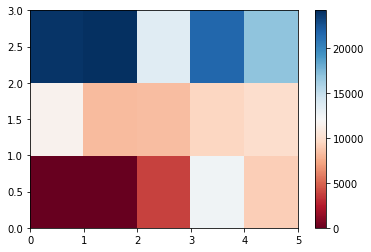

In [49]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [50]:
from scipy import stats

In [51]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5788087329601778  with a P-value of P = 9.910929760901719e-20


/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


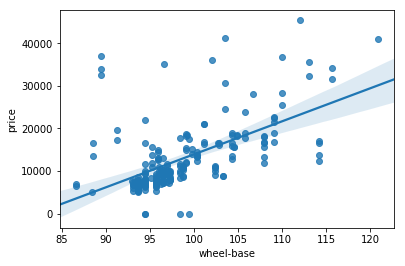

In [52]:
sns.regplot(x='wheel-base',y='price',data=df)

In [53]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.000000
1,rwd,16500.000000
3,fwd,13950.000000
4,4wd,17450.000000
5,fwd,15250.000000
9,4wd,3.329751


In [54]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.000000
1,rwd,convertible,16500.000000
2,rwd,hatchback,16500.000000
3,fwd,sedan,13950.000000
4,4wd,sedan,17450.000000
5,fwd,sedan,15250.000000
6,fwd,sedan,17710.000000
7,fwd,wagon,18920.000000
8,fwd,sedan,23875.000000
9,4wd,hatchback,3.329751


In [55]:
grouped_test2.get_group('4wd')['price']

4      17450.000000
9          3.329751
140     7603.000000
144     9233.000000
145    11259.000000
148     8013.000000
149    11694.000000
154     7898.000000
155     8778.000000
Name: price, dtype: float64

In [56]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 64.28644841481866 , P = 2.480257180601536e-22


In [57]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 64.28644841481866 , P = 2.480257180601536e-22
